In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
# 컬렴명 확인
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Survived')

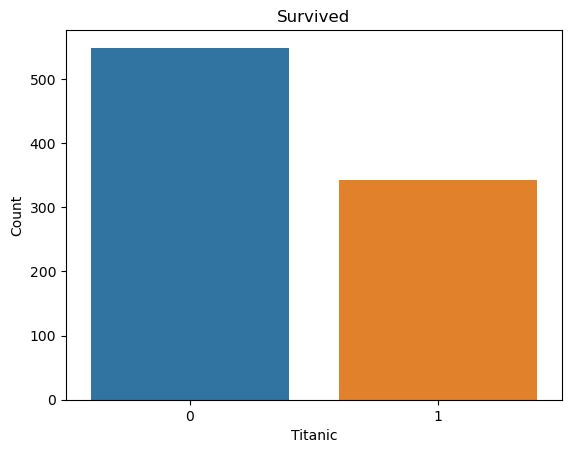

In [30]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Titanic")
plt.ylabel("Count")
plt.title("Survived")

In [31]:
# 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
# 변경된 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

Text(0.5, 1.0, 'Survived')

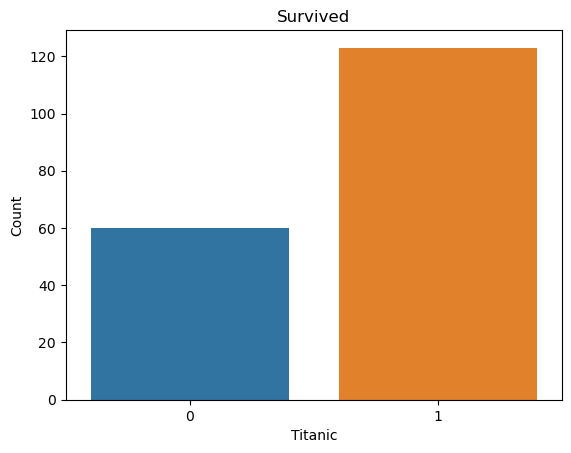

In [35]:
# 변경된 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Titanic")
plt.ylabel("Count")
plt.title("Survived")

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
# 새로운 형태로 데이터프레임 정의 -> 결측치가 많은 cabin 열 삭제
df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]

In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [45]:
# 'Age' 컬럼의 평균 계산
age_mean = df['Age'].mean()
print("Age 컬럼의 평균:", age_mean)

Age 컬럼의 평균: 29.69911764705882


In [46]:
# 결측치를 평균 값으로 대체
df['Age'].fillna(age_mean, inplace=True)

C:\Users\최재인\AppData\Local\Temp\ipykernel_51068\66774725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(age_mean, inplace=True)


In [47]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [48]:
# 결측치 확인
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Text(0.5, 1.0, 'Survived')

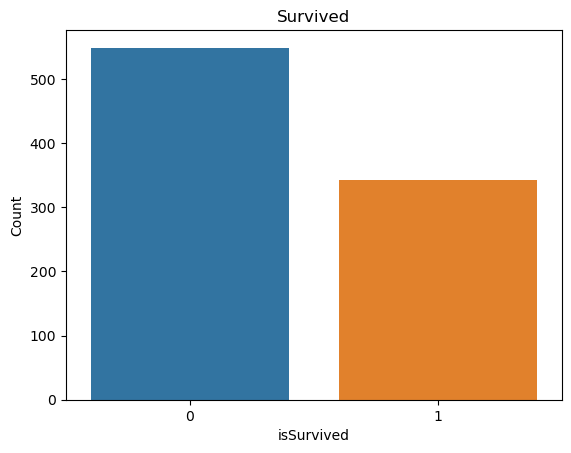

In [49]:
# 변경된 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("isSurvived")
plt.ylabel("Count")
plt.title("Survived")

AgeGroup
(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
Name: Survived, dtype: int64
전체 생존한 사람 수: 342


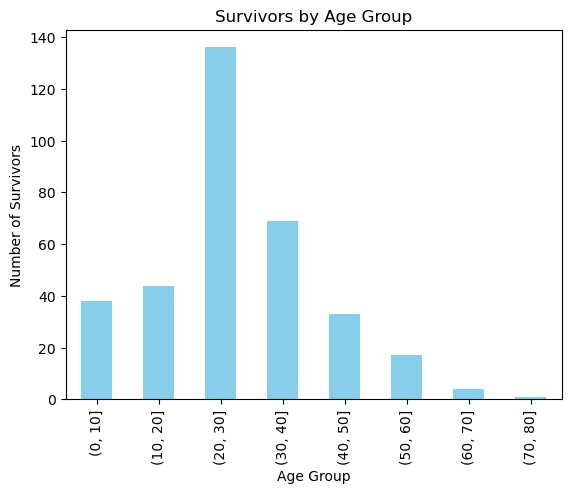

In [50]:
# 나이대 구간 설정
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# 나이대별로 데이터 그룹화
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)

# 나이대를 기준으로 데이터프레임 그룹화 및 생존자 수 합산
survived_by_age = df.groupby('AgeGroup', observed=True)['Survived'].sum()
print(survived_by_age)

total_survived = survived_by_age.sum()
print("전체 생존한 사람 수:", total_survived)

# 시각화
survived_by_age.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')

# 그래프 표시
plt.show()

AgeGroup
(0, 10]      26
(10, 20]     71
(20, 30]    271
(30, 40]     86
(40, 50]     53
(50, 60]     25
(60, 70]     13
(70, 80]      4
Name: Survived, dtype: int64
전체 생존하지 못한 사람 수: 549


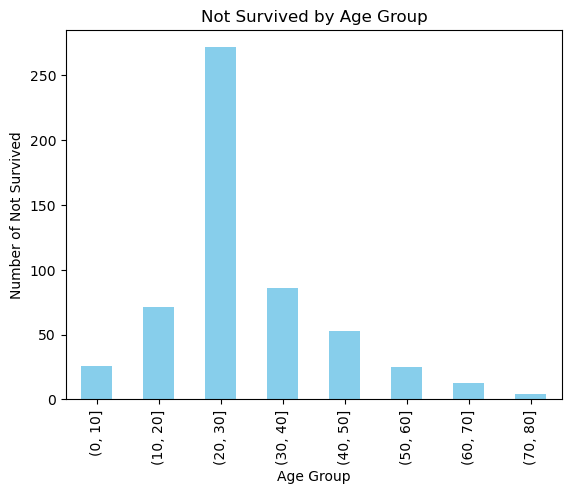

In [51]:
# 생존하지 못한 사람 필터링
not_survived_df = df[df['Survived'] == 0]

# 나이대를 기준으로 데이터프레임 그룹화 및 생존하지 못한 사람 수 합산
not_survived_by_age = not_survived_df.groupby('AgeGroup', observed=True)['Survived'].count()
print(not_survived_by_age)

# 생존하지 못한 사람의 나이대별 수 모두 더하기
total_not_survived = not_survived_by_age.sum()
print("전체 생존하지 못한 사람 수:", total_not_survived)

# 시각화
not_survived_by_age.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 라벨 설정
plt.title('Not Survived by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Not Survived')

# 그래프 표시
plt.show()

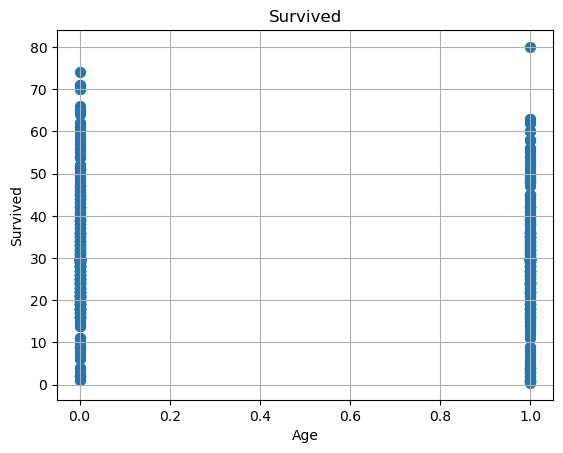

In [52]:
df.plot.scatter(x='Survived', y='Age', marker='o', s=50)

# 그래프 제목과 축 라벨 추가
plt.title('Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.grid('true')

# 그래프 표시
plt.show()

#### Outlier 제거

위 그래프를 보면 생존자 중 80대 생존자가 한 명 존재하는 것이 보인다.
이를 Outlier(이상치)라고 한다. 

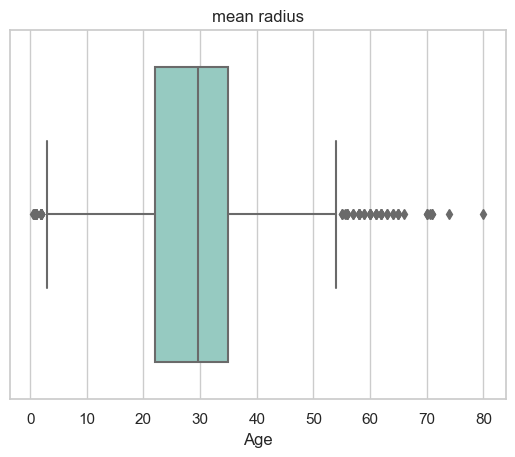

In [53]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("mean radius")
plt.show()